In [19]:
import pandas as pd
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist_1_7_only_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist_1_7_only_test.csv")

In [21]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

In [22]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

AUC: 0.9998345874972147
Accuracy: 0.9930651872399445
Confusion Matrix:
 [[1017   11]
 [   4 1131]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1028
           1       0.99      1.00      0.99      1135

    accuracy                           0.99      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.99      0.99      0.99      2163

ROC-AUC: 0.9998345874972147


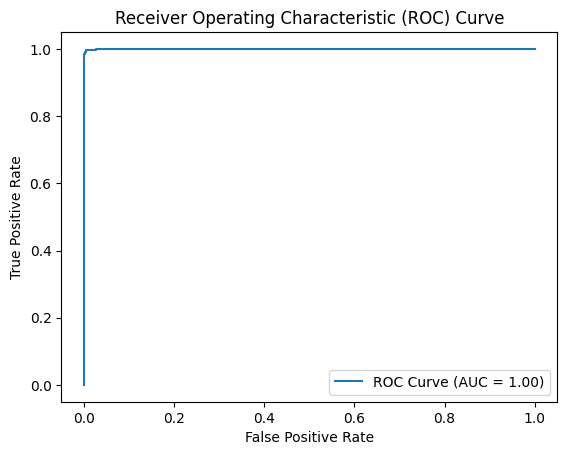

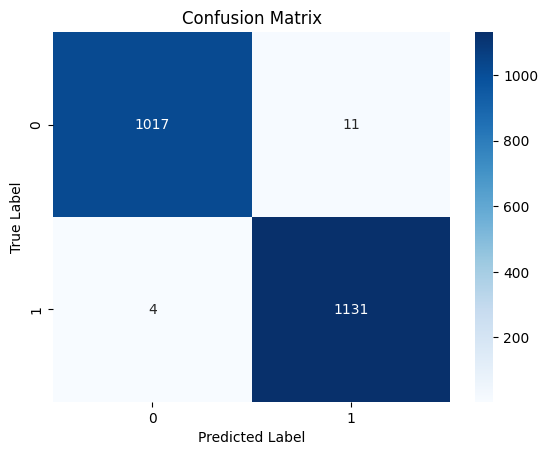

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_prob)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="best")
plt.show()


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

2a. Given The AUC, is my model performance acceptable?
 -Yes this is in aceptiable range, its really good.
2b. Based on the confusion matrix, which number is misclassified the most?

1.   2a. Given The AUC, is my model performance acceptable?
 -Yes this is in aceptiable range, its really good.List item
2.   2b. Based on the confusion matrix, which number is misclassified the most?
-It miss classified 7 as 1 more then it do 1 as 7.  
3. 2c. Do you think a model like this would perform better or worse if it was trained to classify all 10 MNIST classes instead of two?
-It would do worse, because its having to learn alot more information and having to compare alot more data. it would be harder do make it perform just as good as a 2 digit model.

